In [2]:
import nltk
import pandas as pd

In [3]:
#nltk.download_shell()

In [4]:
df = pd.read_csv("C:/Users/Tiger/Downloads/archive (5)/spam.csv", encoding="latin1")

In [5]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df=df.iloc[:,:2]

In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.describe

<bound method NDFrame.describe of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [10]:
len(df)

5572

In [11]:
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

In [12]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [14]:
df['length']=df['message'].apply(len)

In [15]:
df

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

<AxesSubplot:xlabel='length', ylabel='Count'>

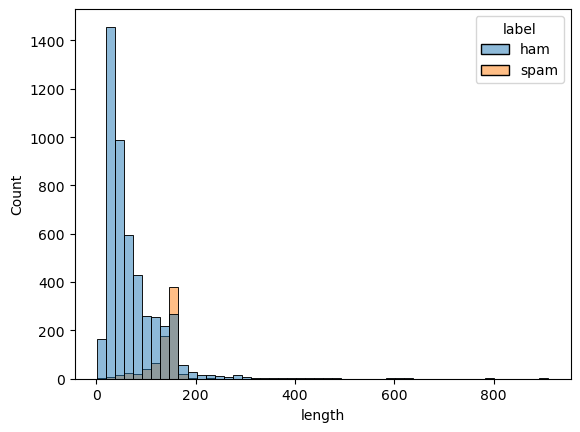

In [17]:
sns.histplot(data=df, x='length', hue='label',bins=50)

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

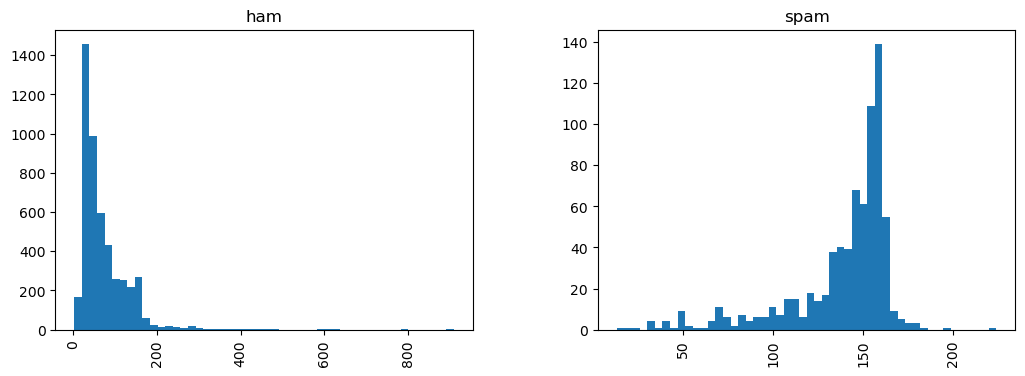

In [18]:
df.hist(column='length',by='label',bins=50,figsize=(12,4))

From this analysis we can conclude that HAM are generally shorter in length where as SPAM are longer in length.

In [19]:
import string

In [23]:
from nltk.corpus import stopwords

In [28]:
def text_process(mess):
    nopunc = [c for c in mess if c not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    

In [69]:
df['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
bow_matrix = CountVectorizer(analyzer=text_process).fit(df['message'])

In [84]:
print(len(bow_matrix.vocabulary_))

11304


In [85]:
bow_matrix.get_feature_names_out()[4551]

'already'

In [86]:
message_bow = bow_matrix.transform(df['message'])

In [87]:
print(message_bow)

  (0, 1096)	1
  (0, 1461)	1
  (0, 2027)	1
  (0, 4574)	1
  (0, 5135)	1
  (0, 5136)	1
  (0, 5685)	1
  (0, 6131)	1
  (0, 6815)	1
  (0, 6846)	1
  (0, 7456)	1
  (0, 7567)	1
  (0, 8231)	1
  (0, 8809)	1
  (0, 10845)	1
  (0, 11043)	1
  (1, 2407)	1
  (1, 3012)	1
  (1, 7600)	1
  (1, 8482)	1
  (1, 10582)	1
  (1, 10952)	1
  (2, 73)	1
  (2, 422)	1
  (2, 429)	1
  :	:
  (5568, 6604)	1
  (5568, 6791)	1
  (5568, 7065)	1
  (5568, 11239)	1
  (5569, 3169)	1
  (5569, 3655)	1
  (5569, 8147)	1
  (5569, 10087)	1
  (5570, 4430)	1
  (5570, 4973)	1
  (5570, 5169)	1
  (5570, 6196)	1
  (5570, 6612)	1
  (5570, 6710)	1
  (5570, 6892)	1
  (5570, 7190)	1
  (5570, 7297)	1
  (5570, 7698)	1
  (5570, 8314)	1
  (5570, 9804)	1
  (5570, 10669)	1
  (5570, 10886)	1
  (5571, 3370)	1
  (5571, 8243)	1
  (5571, 10532)	1


In [88]:
print(message_bow.shape)

(5572, 11304)


In [89]:
message_bow.nnz

50193

In [90]:
from sklearn.feature_extraction.text import TfidfTransformer

In [91]:
tfidf_transformer = TfidfTransformer().fit(message_bow)

In [92]:
message_tfidf=tfidf_transformer.transform(message_bow)

In [93]:
print(message_tfidf)

  (0, 11043)	0.2302307806673824
  (0, 10845)	0.19070440364977176
  (0, 8809)	0.24700781968848798
  (0, 8231)	0.17135863098645995
  (0, 7567)	0.263992475219973
  (0, 7456)	0.31248959807463006
  (0, 6846)	0.18344049775392818
  (0, 6815)	0.15156099829325625
  (0, 6131)	0.18912594285931972
  (0, 5685)	0.2498079760885523
  (0, 5136)	0.26866384122613163
  (0, 5135)	0.2983050989432094
  (0, 4574)	0.31248959807463006
  (0, 2027)	0.24200168290449323
  (0, 1461)	0.31248959807463006
  (0, 1096)	0.28824103664730155
  (1, 10952)	0.4005697292204744
  (1, 10582)	0.20689436953946386
  (1, 8482)	0.504282830397047
  (1, 7600)	0.37669696082530857
  (1, 3012)	0.29116619142344646
  (1, 2407)	0.5619244500186726
  (2, 11003)	0.1909725859033143
  (2, 10964)	0.15964606600812142
  (2, 10570)	0.1399031851067661
  :	:
  (5568, 6791)	0.31367469776242124
  (5568, 6604)	0.47781076401785183
  (5568, 6267)	0.5575721048646767
  (5568, 4801)	0.3853122086093004
  (5569, 10087)	0.520467167163554
  (5569, 8147)	0.432829970

In [94]:
from sklearn.naive_bayes import MultinomialNB

In [95]:
spam_detect_model = MultinomialNB().fit(message_tfidf,df['label'])

In [96]:
mess4=df['message'][3]

In [97]:
mess4

'U dun say so early hor... U c already then say...'

In [98]:
bow4=bow_matrix.transform([mess4])
print(bow4)

  (0, 3996)	2
  (0, 4551)	1
  (0, 5179)	1
  (0, 6118)	1
  (0, 6136)	1
  (0, 7091)	1
  (0, 9445)	2


In [99]:
tfidf4=tfidf_transformer.transform(bow4)

In [101]:
print(tfidf4)

  (0, 9445)	0.5391515179363724
  (0, 7091)	0.438375519235493
  (0, 6136)	0.3183143011307023
  (0, 6118)	0.2991551295536476
  (0, 5179)	0.2969195675145299
  (0, 4551)	0.26585776633899993
  (0, 3996)	0.40924708612713756


In [103]:
spam_detect_model.predict((tfidf4)[0])

array(['ham'], dtype='<U4')

In [105]:
df['label'][3]

'ham'

In [106]:
all_pred=spam_detect_model.predict(message_tfidf)
print(all_pred)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [108]:
from sklearn.metrics import classification_report
print(classification_report(df['label'],all_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572

